In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### in this regression, we use 1 and 0 to represent renew, and exclude cost 
### because cost and qty is the same as sales 
### we also include the days_dif, which represents the days between the lastday of buying and 2018-01-31
### and include the amount a customer has paid in such tender type
### include visit frequecy
member = pd.read_csv('all_member01.csv')

In [3]:
tender = pd.read_csv('member_join_tender.csv')

In [4]:
td = tender.fillna(0)

In [5]:
all = pd.merge(member, td, left_on = 'MEMBERSHIP_ID', right_on = 'MEMBERSHIP_ID', how = 'left')

In [6]:
all.columns.values.tolist()

['Unnamed: 0_x',
 'X',
 'MEMBERSHIP_ID',
 'MEMBERSHIP_TYPE_CODE',
 'MILES_TO_CLUB',
 'hhh_age_desc',
 'marital_status_desc',
 'income_lower',
 'income_upper',
 'hh_size_desc',
 'nbr_children_desc',
 'ethnic_desc',
 'JOIN_DATE',
 'RENEW_IND',
 'PLUS_STATUS_BEFORE_REN',
 'autorenew_ind',
 'payroll_deduct_ind',
 'sales',
 'qty',
 'cost',
 'num',
 'date_min',
 'date_max',
 'num_visit',
 'num_category',
 'num_sub_category',
 'num_item',
 'days_dif',
 'freq',
 'Unnamed: 0_y',
 'sum.Cash (change)',
 'sum.Debit Card',
 'sum.Discover',
 'sum.EBT Foodstamps',
 'sum.Mastercard',
 'sum.Shopping Card',
 'sum.Visa',
 'sum.American Express',
 'sum.DOTCOM',
 'sum.Sams Consumer Credit',
 'sum.Wal-Mart Credit Card',
 'sum.Associate Discount Card',
 'sum.Electronic Check (ECA)',
 'sum.Coupon',
 'sum.Payroll Check',
 'sum.Rx third party sales',
 'sum.Sams Business Credit',
 'sum.Service Income',
 'sum.Unknown',
 'sum.NA',
 'sum.EBT Cash',
 'sum.Check',
 'sum.Sams Direct Credit',
 'sum.Fleet',
 'sum.Coin V

In [7]:
columns=['sales','num_visit','num_item','num_category','num_sub_category','MEMBERSHIP_TYPE_CODE','MILES_TO_CLUB','hhh_age_desc','marital_status_desc','income_lower','income_upper','hh_size_desc','nbr_children_desc','ethnic_desc','PLUS_STATUS_BEFORE_REN','autorenew_ind','payroll_deduct_ind','days_dif','freq',
 'sum.Cash (change)',
 'sum.Debit Card',
 'sum.Discover',
 'sum.EBT Foodstamps',
 'sum.Mastercard',
 'sum.Shopping Card',
 'sum.Visa',
 'sum.American Express',
 'sum.DOTCOM',
 'sum.Sams Consumer Credit',
 'sum.Wal-Mart Credit Card',
 'sum.Associate Discount Card',
 'sum.Electronic Check (ECA)',
 'sum.Coupon',
 'sum.Payroll Check',
 'sum.Rx third party sales',
 'sum.Sams Business Credit',
 'sum.Service Income',
 'sum.Unknown',
 'sum.NA',
 'sum.EBT Cash',
 'sum.Check',
 'sum.Sams Direct Credit',
 'sum.Fleet',
 'sum.Coin Voucher']

In [8]:
X = all[columns]
Y = all['RENEW_IND']
X['days_dif']=X['days_dif'].fillna(396)
X = X.fillna(X.mean())
X = minmax_scale(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.5, random_state = 100)
lr= LogisticRegression()
lr.fit(X_train,y_train)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
coefficients = lr.coef_
coefficients

array([[ 1.17062238, -0.10458481, 15.93388354,  0.93898847, -1.61759316,
         0.035856  ,  0.06223923,  0.82631273,  0.14541275, -0.02426226,
         0.12532127,  0.16517347, -0.5534198 ,  0.03599795, -0.03019333,
         5.19673682,  4.99887931, -2.65310094, -1.28256213,  0.41965008,
         1.68081536,  0.37738835, -5.122429  ,  0.14460439,  1.16607402,
         0.68794701,  0.27050808,  0.19691619,  0.41305089,  0.25600232,
        -0.09897692, -0.09081736,  2.19208086,  1.08230607,  1.12961173,
         0.02256358,  0.11732305,  0.22967719,  0.        , -0.0252735 ,
        -0.0730246 , -0.09184592,  0.04836545, -0.06398833]])

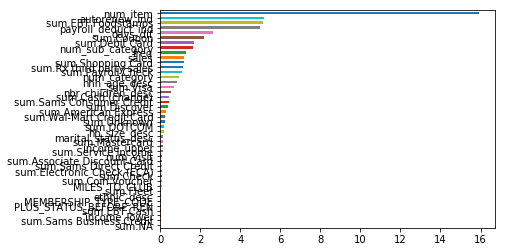

In [10]:
feature_importance = pd.Series(coefficients[0],index = all[columns].columns)

ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

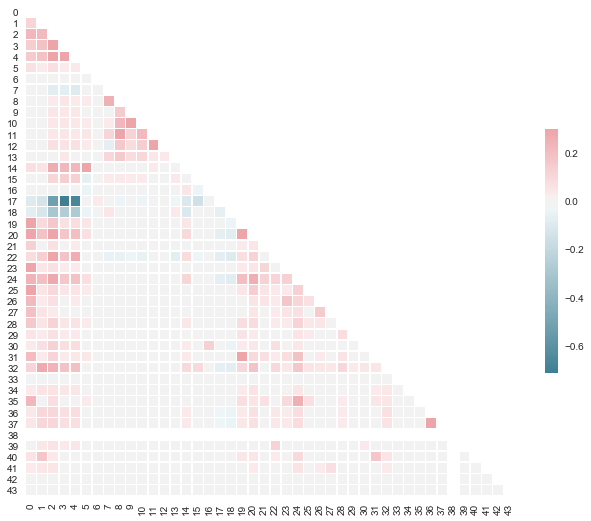

In [11]:
import seaborn as sns
import numpy as np
def plot_heatmap(df):
    corr = df.corr()
    sns.set(style = 'white')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_heatmap(pd.DataFrame(X_train))

## In the second step we select the significant variables

In [12]:
lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(X_train,y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [13]:
optimized_columns= pd.DataFrame(columns,selector.support_)
optimized_columns


,0
True,sales
False,num_visit
True,num_item
False,num_category
False,num_sub_category
False,MEMBERSHIP_TYPE_CODE
False,MILES_TO_CLUB
False,hhh_age_desc
False,marital_status_desc
False,income_lower


In [14]:
from sklearn.metrics import accuracy_score
y_pred = selector.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  77.18974444052729


## Finally we use the significant X variables to confirm the regression

In [1]:
col=['sales','num_item','autorenew_ind','payroll_deduct_ind','days_dif','sum.Debit Card','sum.EBT Foodstamps','sum.Coupon' ]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
member = pd.read_csv('all_member01.csv')
tender = pd.read_csv('member_join_tender.csv')
td = tender.fillna(0)
all = pd.merge(member, td, left_on = 'MEMBERSHIP_ID', right_on = 'MEMBERSHIP_ID', how = 'left')

In [5]:
XX = all[col]
YY = all['RENEW_IND']
XX['days_dif']=XX['days_dif'].fillna(396)
XX = XX.fillna(XX.mean())
XX = minmax_scale(XX)
XX_train, XX_test, yy_train, yy_test = train_test_split( XX, YY, test_size = 0.5, random_state = 100)
lr_final= LogisticRegression()
lr_final.fit(XX_train,yy_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
coefficients = lr_final.coef_
coefficients

array([[ 1.74374754, 11.550083  ,  5.21593252,  4.93031114, -2.45060914,
         1.86699783, -6.78107846,  2.38825175]])

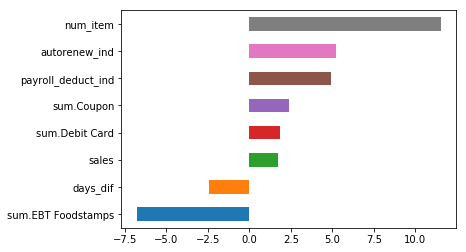

In [8]:
feature_importance_final = pd.Series(coefficients[0],index = all[col].columns)

ordered_feature_importance_final = feature_importance_final.sort_values()
ordered_feature_importance_final.plot.barh()
plt.show()